In [2]:
def magnitude(vector): 
    return np.sqrt(sum(pow(element, 2) for element in vector))

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from tqdm import tqdm
from mpl_toolkits import mplot3d
from numpy import array, where, shape, reshape
np.set_printoptions(threshold=1000)

### Importar archivos

In [3]:
file = uproot.open("/snoplus simulations/electron bulk/center point/simu_Analysis_elec_z_10MeV.root")

type(file)

uproot.reading.ReadOnlyDirectory

### Explorar TTrees

In [4]:
branches = file.keys()
branches

['T;1', 'pmt;2', 'pmt;1']

In [5]:
data1 = file['T;1']
data1.keys()

['evtid',
 'mcID',
 'mc_position',
 'mc_momentum',
 'position',
 'momentum',
 'hit_pmtid',
 'hit_pmttime',
 'hit_residual',
 'hit_type']

In [6]:
evtid = np.array(data1['evtid'])
mc_position = np.array(data1['mc_position'])
position = np.array(data1['position'])
hit_pmtid = np.array(data1['hit_pmtid'])
hit_pmttime = np.array(data1['hit_pmttime'])
hit_residual = np.array(data1['hit_residual'])
hit_type = np.array(data1['hit_type'])

In [7]:
hit_pmtid

array([8977, 8612,  345, ..., 1784, 7472, 9207])

In [11]:
for i in hit_type[0:100]:
    print (i)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2


#### Nº of events

In [20]:
np.max(evtid)

2000

### Verify if plots make sence

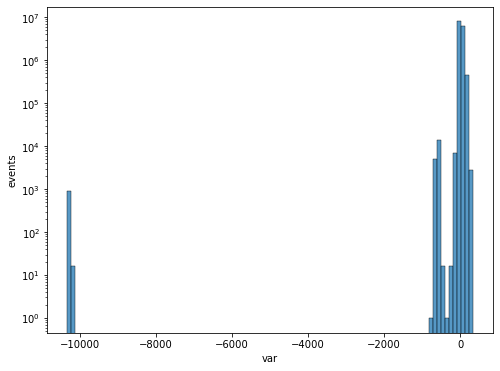

In [21]:
var = hit_residual

plt.figure(figsize=(8,6))
sn.histplot(var, bins = 100)
plt.xlabel('var')
plt.ylabel('events')
plt.yscale('log')

In [1]:
where(hit_residual<-8000)  

NameError: name 'where' is not defined

In [23]:
#take one of the eventsID with high negative time residual value
evtid[24294]

31

#### pmtID giving hits with time residual too negative! (t_res about -10.000 and -600)

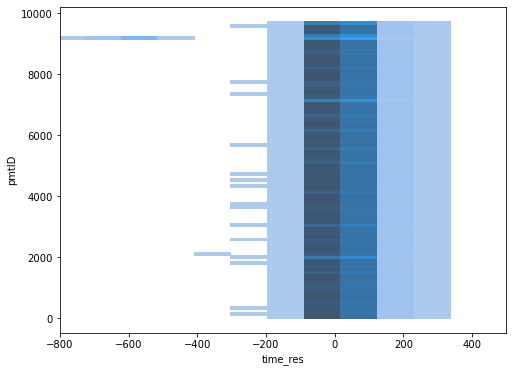

In [24]:
plt.figure(figsize=(8,6))
sn.histplot(x=hit_residual, y = hit_pmtid, bins = 100)
plt.xlabel('time_res')
plt.ylabel('pmtID')
plt.xlim(-800,500)
plt.show()

## Fail PMTid

Lets identify the ID of these problematic PMTs ...

In [25]:
fail_pmt_index = where(hit_residual < -200)
fail_pmt_id = np.array([], dtype = np.int64)

for index in tqdm(fail_pmt_index):
    fail_pmt_id = np.append(fail_pmt_id, hit_pmtid[index])

fail_pmt_id = np.unique(fail_pmt_id)
fail_pmt_id

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.70it/s]


array([   3,   40,   52,   59,   75,   97,  116,  132,  141,  144,  187,
        189,  217,  232,  235,  236,  267,  285,  289,  292,  302,  308,
        315,  316,  318,  324,  342,  361,  363,  366,  374,  401,  414,
        421,  435,  437,  458,  466,  469,  482,  486,  503,  531,  538,
        550,  553,  560,  565,  568,  579,  583,  587,  596,  597,  600,
        633,  636,  648,  663,  664,  677,  679,  684,  692,  694,  697,
        705,  713,  717,  720,  739,  741,  742,  751,  764,  765,  766,
        775,  823,  828,  830,  834,  850,  852,  873,  889,  892,  893,
        895,  918,  922,  931,  962, 1004, 1035, 1048, 1082, 1101, 1107,
       1118, 1123, 1140, 1141, 1153, 1164, 1190, 1200, 1219, 1225, 1237,
       1244, 1248, 1265, 1276, 1282, 1292, 1296, 1311, 1333, 1335, 1351,
       1359, 1367, 1373, 1378, 1384, 1399, 1408, 1409, 1419, 1427, 1430,
       1433, 1435, 1450, 1459, 1462, 1464, 1469, 1476, 1504, 1515, 1526,
       1544, 1551, 1562, 1575, 1576, 1578, 1590, 16

### Extract PMT info.
PMT info. is relative to its standar positions, identificators, etc. They dont correspond to hits of events!

In [9]:
pmt_info = file['pmt;1']
pmt_info.keys()

['pmt_id', 'pmt_pos_xyz', 'pmt_pos_sph', 'pmt_type']

In [10]:
pmt_id = array(pmt_info['pmt_id'])
pmt_pos_xyz = array(pmt_info['pmt_pos_xyz'])
pmt_pos_sph = array(pmt_info['pmt_pos_sph'])
pmt_type = array(pmt_info['pmt_type'])

#Now, pass to array--------------

#pmt_id = np.array(pmt_id)
#pmt_pos_xyz = np.array(pmt_pos_xyz)
#pmt_pos_sph = np.array(pmt_pos_sph)
#pmt_type = np.array(pmt_type)

In [11]:
pmt_pos_xyz[8977]

array([ 6047.76, -2662.56,  5197.2 ])

In [32]:
np.shape(pmt_pos_xyz)

(9728, 3)

In [33]:
np.shape(pmt_pos_sph)

(9728, 3)

In [34]:
np.shape(pmt_type)

(9728,)

### Clean PMT type (just pmt_type = 1 || pmt_type = 7)
Get the list of pmtID which are valid in the PMT info

In [75]:
type_ = array([1,7])
clean_pmt_id = np.array([],np.int32) #pmtID which are valid
valid_index_pmt_type = np.array([],np.int32)

#valid_index_pmt_type_list = [] # List of Indices of valids pmtID (util solo en pmt info, no en registro de eventos -> guardo el array, no la lista!!)

for i_type in tqdm(type_):
    p = where(pmt_type == i_type)[0] #look for indices ef valid PMT
    #if i_type == 7:
    #    print(p)
    valid_index_pmt_type = np.concatenate((valid_index_pmt_type,p))
    
    #valid_index_list.append(p)
    #print(valid_index_list)
    #valid_index_pmt_type = valid_index_list[0][0] #extact the np.array
#print(valid_index_pmt_type_list)

for valid_i in tqdm(valid_index_pmt_type):
    clean_pmt_id = np.append(clean_pmt_id,pmt_id[valid_i])
    
print(clean_pmt_id)
len(clean_pmt_id)

100%|███████████████████████████████████████████████████████████████████████████| 9394/9394 [00:00<00:00, 38454.28it/s]

[   1    2    3 ... 3536 3856 8163]


9394

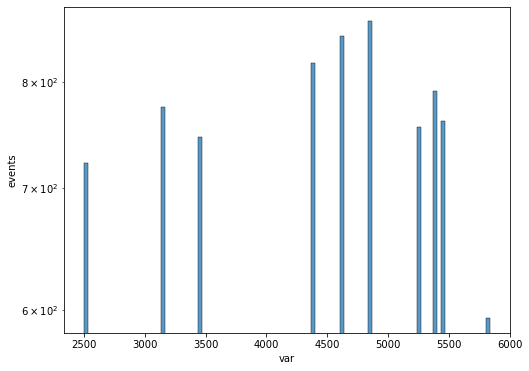

In [69]:
var = mc_radius_ev

plt.figure(figsize=(8,6))
sn.histplot(var, bins = 100)
plt.xlabel('var')
plt.ylabel('events')
plt.yscale('log')

In [37]:
pmt_id

array([   0,    1,    2, ..., 9725, 9726, 9727])

In [38]:
len(valid_index_pmt_type)

9394

In [39]:
pmt_type

array([10,  1,  1, ...,  2,  2,  2])

# Event Analysis

Lest choose one event and see what we can see

In [40]:
event = 11 #EventID = 14 #EventID = 11 is problematic
condition = (evtid == event) #which event ID is true 

pmtid_ev = np.extract(condition, hit_pmtid) #Indices for which elements are True in eventID then extract the hit_pmtID
time_res_ev = np.extract(condition, hit_residual)
pmttime_ev = np.extract(condition, hit_pmttime)
N_events = len(pmtid_ev)

#special trait to extract positions...
pre_mc_position_ev = np.array([]) #Monte Carlo position (pre bc need to be reshaped - coordinates are all aligned)
mc_radius_ev = np.array([])  #Monte Carlo radius

for i in where(condition)[0]:
    pre_mc_position_ev = np.append(pre_mc_position_ev, mc_position[i])
mc_position_ev = pre_mc_position_ev.reshape(N_events,3)

for i in range(N_events):
    mc_radius_ev = np.append(mc_radius_ev,magnitude(mc_position_ev[i]))
    
N_events
#print(pmtid_ev)

7674

In [41]:
mc_radius_ev

array([5394.23974754, 5394.23974754, 5394.23974754, ..., 5465.10539011,
       5465.10539011, 5465.10539011])

In [42]:
mc_position_ev

array([[ 3557.81079102, -2256.09936523,  3368.94946289],
       [ 3557.81079102, -2256.09936523,  3368.94946289],
       [ 3557.81079102, -2256.09936523,  3368.94946289],
       ...,
       [-1791.13085938, -2320.78710938,  4612.28515625],
       [-1791.13085938, -2320.78710938,  4612.28515625],
       [-1791.13085938, -2320.78710938,  4612.28515625]])

### Time residual of the event = event

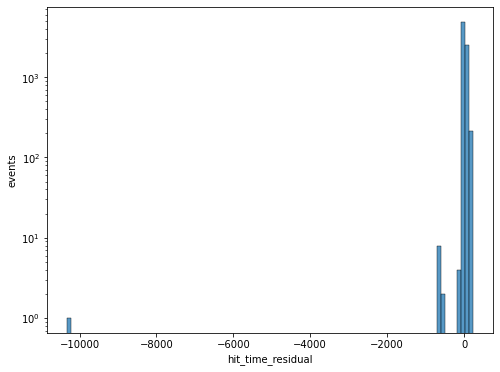

In [43]:
plt.figure(figsize=(8,6))
sn.histplot(time_res_ev, bins = 100)
plt.xlabel('hit_time_residual')
plt.ylabel('events')
plt.yscale('log')

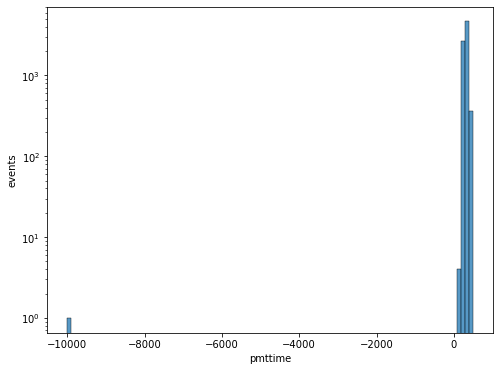

In [77]:
plt.figure(figsize=(8,6))
sn.histplot(pmttime_ev, bins = 100)
plt.xlabel('pmttime')
plt.ylabel('events')
plt.yscale('log')

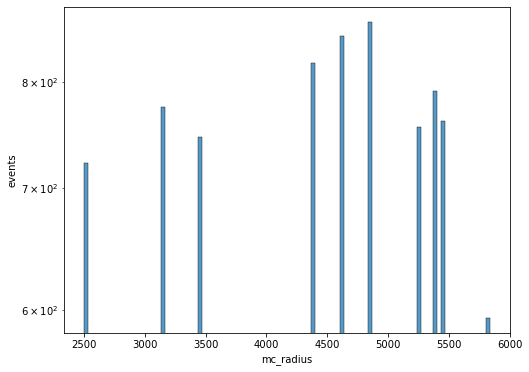

In [78]:
plt.figure(figsize=(8,6))
sn.histplot(mc_radius_ev, bins = 100)
plt.xlabel('mc_radius')
plt.ylabel('events')
plt.yscale('log')

### Proof if it is right
Was verified using ROOT, same entries!
Open file .py in ROOT,
T-> GetEntries('evtid==14')

In [46]:
np.unique(pmt_type,return_counts=True) #([Nº PMT Type],[Nº of PMTs])

(array([ 1,  2,  3,  4,  5,  6,  7, 10]),
 array([9390,   91,   49,   22,    4,   32,    4,  136], dtype=int64))

### Looking for the index of the PMT by mean their ID and extract coordinates

In [47]:
# prueba
a = np.array([1,1,2,2,4])
(np.array(np.where(a == 2)))[0]

array([2, 3], dtype=int64)

In [48]:
#compare elements between arrays

x = array([1,2,3,4])
y = array([1,8,9,4,1,1])
print(np.in1d(y,x)) #y in x -less convenient because of dim(y)>dim(x)
print(np.in1d(x,y)) #x in y

[ True False False  True  True  True]
[ True False False  True]


In [79]:
pmt_ids_idx = np.where(np.in1d(clean_pmt_id,pmtid_ev))[0] #index of PMTsID in pmtINFO in which is verified a hit in data

In [81]:
#index_pmt = array([index_pmt]).reshape((len(index)))
for i_idx in range(0,10):
    print(pmt_pos_xyz[i_idx])

[-99999. -99999. -99999.]
[ 5467.54    63.44 -6406.27]
[ 5615.16   266.8  -6251.09]
[ 5762.73   469.91 -6095.92]
[ 5910.5    673.23 -5940.54]
[ 7295.12  3775.89 -1812.97]
[ 5402.51   349.82 -6438.44]
[ 5550.13   553.18 -6283.26]
[ 5697.85   756.25 -6127.89]
[ 2380.63  -176.3  -8059.18]


In [82]:
#Extract coordinates of PMTs with hits

hitpmt_coord = []

#print(index_pmt)
for i in tqdm(pmt_ids_idx):
    #print(clean_pmt_id[i])
    hitpmt_coord.append(pmt_pos_xyz[clean_pmt_id[i]])

#print(len(hitpmt_coord))
hitpmt_coord = np.array(hitpmt_coord)#.reshape((len(hitpmt_coord),3))
hitpmt_coord[0][0]                              

100%|██████████████████████████████████████████████████████████████████████████| 4847/4847 [00:00<00:00, 607494.14it/s]


5467.54

In [84]:
clean_pmt_id

array([   1,    2,    3, ..., 3536, 3856, 8163])

In [85]:
pmt_ids_idx

array([   0,    1,    3, ..., 8514, 8515, 8517], dtype=int64)

In [86]:
len(pmt_ids_idx)

4847

In [87]:
np.shape(hitpmt_coord)

(4847, 3)

In [88]:
hitpmt_coord

array([[ 5467.54,    63.44, -6406.27],
       [ 5615.16,   266.8 , -6251.09],
       [ 5910.5 ,   673.23, -5940.54],
       ...,
       [ 4446.56, -1228.43, -7046.97],
       [ 5222.62,  -687.16, -6558.71],
       [ 4855.54, -1099.81, -6767.98]])

### PMT hit coord distribution

In [101]:
%matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

x = hitpmt_coord[:,0]
y = hitpmt_coord[:,1]
z = hitpmt_coord[:,2]

ax.scatter(x, y, z, c = 'r', s = 1)
#plt.xlim(-10000,10000)
#plt.ylim(-10000,10000)

Using matplotlib backend: Qt5Agg


# Now, take this cleaned PMT id and lets clean data for a given event ID

- Usar PMTid_clean para buscar los indices de los pmts que dieron hit --> comparar (clean_pmt_id, hit_pmtid);
- Teniendo esa comparación extraer indices y extraer clean info. usando los indices;

In [91]:
x = np.array([1, 3, 4, 5])
y = np.array([1, 2, 2, 5, 3, 6, 7, 1])

where(np.in1d(y, x))

(array([0, 3, 4, 7], dtype=int64),)

#### Indices of data clean

In [92]:
len(where(np.in1d(pmtid_ev, clean_pmt_id))[0])

6967

In [93]:
len(pmtid_ev)

7674

In [94]:
for i in pmtid_ev:
    if i == 9207:
        print('here')

here
here
here
here
here
here
here
here
here
here


#### Lets see the time residuals

In [104]:
time_res_clean = np.array([]) #Time residuals of clean data given a event
pmttime_clean = np.array([]) #time of pmt hit of in clean data given a event
pmtid_clean_ev = np.array([], dtype = np.int32) #clean pmt ID given a event

for i in tqdm((where(np.in1d(pmtid_ev, clean_pmt_id))[0])):
    pmtid_clean_ev = np.append(pmtid_clean_ev, pmtid_ev[i])
    time_res_clean = np.append(time_res_clean, hit_residual[i])
    pmttime_clean = np.append(pmttime_clean,hit_pmttime[i])

100%|███████████████████████████████████████████████████████████████████████████| 6967/6967 [00:00<00:00, 23958.88it/s]


In [96]:
pmtid_clean_ev

array([8519, 8484, 8966, ..., 2876, 8143, 2515])

In [116]:
r = time_res_clean < -200
for i in r:
    if i == True:
        print('here')

here
here
here
here
here
here
here
here


In [114]:
for i in pmtid_clean_ev:
    #if i == 9207:
    if i == 8080:
        print('here')

In [98]:
def hist(x, bins, xtitle):
    
    plt.figure(figsize=(8,6))
    sn.histplot(x, bins = bins)
    plt.xlabel(xtitle)
    plt.ylabel('events')
    plt.yscale('log')

In [117]:
hist(time_res_clean, 100, 'hit_time_residual')

Hace sentido time residual a -600? ya verifique los cortes y desaparece el pico t t_res = -10.000 usando evento ID=11

In [102]:
hist(pmttime_clean, 100, 'hit_pmttime')

No es culpa del pmt time visto que corta su valor negativo para el evento ID = 11

### Cuts in Time residual - Looking for Cherenkov!

Lets choose $t_{res} = [[0,5] , [0,10], [0,15]]ns$

In [441]:
#up_condition_cev = (time_res_clean <= 4)
#do_condition_cev = (time_res_clean >= -4)

#all_condition_cev = (up_condition_cev == do_condition_cev)

#time_res_cev = np.extract(all_condition_cev, time_res_clean)
#pmtid_cev_ev = np.extract(all_condition_cev, pmtid_clean_ev)

In [107]:
time_res_cev = np.array([])
pmtid_cev_ev = np.array([], dtype = np.int64)

terms = len(time_res_clean)

for i in tqdm(range(terms)):
    if (time_res_clean[i] <= 3 and time_res_clean[i]>=0):
        time_res_cev = np.append(time_res_cev, time_res_clean[i])
        pmtid_cev_ev = np.append(pmtid_cev_ev, pmtid_clean_ev[i])

100%|██████████████████████████████████████████████████████████████████████████| 6967/6967 [00:00<00:00, 332620.58it/s]


In [108]:
#pmtid_cev_ev
#pmtid_clean_ev

In [109]:
hist(time_res_cev, 100, 'time_res_cev')

In [111]:
#extract indices of PMT info and to extract the coordinates
index_pmt_cev = np.where(np.in1d(clean_pmt_id, pmtid_cev_ev))[0] #index of PMTs in pmtINFO in which is verified a hit in data
index_pmt_cev

array([   0,    4,   28,   58,   66,   73,   95,  102,  114,  171,  173,
        185,  190,  192,  210,  234,  254,  268,  297,  298,  324,  340,
        351,  354,  382,  405,  418,  442,  472,  473,  601,  606,  640,
        641,  648,  656,  701,  712,  714,  749,  762,  787,  800,  894,
        907,  923,  934,  948,  949,  962,  996, 1016, 1021, 1023, 1028,
       1032, 1035, 1038, 1057, 1060, 1073, 1076, 1136, 1166, 1229, 1237,
       1303, 1328, 1332, 1342, 1368, 1403, 1404, 1407, 1429, 1435, 1443,
       1448, 1502, 1511, 1541, 1593, 1619, 1658, 1686, 1705, 1736, 1831,
       1839, 1869, 1871, 1977, 1986, 1988, 2099, 2107, 2114, 2181, 2278,
       2295, 2324, 2424, 2435, 2473, 2489, 2495, 2497, 2526, 2529, 2532,
       2568, 2597, 2606, 2637, 2664, 2785, 2850, 2905, 2919, 2927, 2986,
       2990, 3000, 3031, 3033, 3107, 3125, 3149, 3166, 3207, 3218, 3227,
       3267, 3336, 3351, 3402, 3430, 3431, 3435, 3465, 3501, 3554, 3556,
       3581, 3588, 3830, 3847, 3875, 3882, 3884, 39

In [112]:
hitpmt_coord_cev = []

for i_dx in tqdm(index_pmt_cev):
    hitpmt_coord_cev.append(pmt_pos_xyz[clean_pmt_id[i_dx]])
    #print(hitpmt_coord_cev)
    
hitpmt_coord_cev = np.array(hitpmt_coord_cev)
#shape(hitpmt_coord_cev)

100%|████████████████████████████████████████████████████████████████████████████| 356/356 [00:00<00:00, 178651.86it/s]


In [130]:
#%matplotlib
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

x = hitpmt_coord_cev[:,0]
y = hitpmt_coord_cev[:,1]
z = hitpmt_coord_cev[:,2]

ax.scatter(x, y, z, c = 'b', s = 2)
#plt.xlim(-10000,10000)
#plt.ylim(-10000,10000)

In [480]:
hitpmt_coord_cev

array([[ 5467.54,    63.44, -6406.27],
       [ 5402.51,   349.82, -6438.44],
       [ 6457.81,  1400.72, -5197.09],
       ...,
       [ 7166.11, -3420.45,  2808.21],
       [ 6536.7 , -4801.31,  2192.39],
       [ 6078.68, -5666.4 ,  1149.76]])

### Vale la pena cortar time residual < -200? veamos esto rapidamente para un evento ID

In [180]:
i_proof = np.array([], dtype = np.int32)  #indices de residuals filtrados
id_proof_ev = np.array([], dtype = np.int32) #PMTid de pmt que dieron hit dado un eventos y que cumplen con los indices de residuals filtrados
# id_proof = np.array([]) #PMTid de pmt info que cumplan con los residuales filtrados
coord_proof = []

for i in time_res_ev:
    if i > -200 and i < 5:
        i_proof = np.append(i_proof, where(time_res_ev == i)[0][0])

#ID_removed = np.delete(pmtid_ev,i_proof) 
for i in i_proof:
    id_proof_ev = np.append(id_proof_ev, pmtid_ev[i])

# where(pmt_id == id_proof_ev)[0]
for i in where(np.in1d(pmt_id,id_proof_ev))[0]:
    coord_proof.append(pmt_pos_xyz[pmt_id[i]])
coord_proof = np.array(coord_proof)

In [181]:
coord_proof

array([[ 5697.85,   756.25, -6127.89],
       [ 5632.83,  1042.63, -6160.06],
       [ 6563.03,  1591.96, -4998.31],
       ...,
       [ 6371.14, -5044.94,  2172.51],
       [ 6196.91, -5402.28,  1664.71],
       [ 6078.68, -5666.4 ,  1149.76]])

In [186]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

x = coord_proof[:,0]
y = coord_proof[:,1]
z = coord_proof[:,2]

ax.scatter(x, y, z, c = 'r', s = 1)

In [157]:
x = array([1,2,3,4])

where(x==1)[0][0]

0